In [247]:
import numpy as np
import os
import matplotlib.pyplot as plt

valid_metrics = ['rmseloss', 'maeloss', 'quantile score (q=3)', 'accuracy rate']
ffnn_params=set()
rnn_params=set()
cnn_params=set()
all_results = []

for file in os.listdir('training results'):
    if file[-4:] != '.npz':
        continue
    f = np.load(os.path.join('training results', file))
    # Mean over k folds, extract value from last epoch
    t = f['train_loss'].mean(axis=-1)
    v = f['valid_loss'].mean(axis=-1)
    v[0] = np.sqrt(v[0])
    
    params = file.split('--')
    nn_dict = {'type': params.pop(0)[:-1], 'train':t, **dict(zip(valid_metrics,v))}
    params[-1] = params[-1][:-4]
    for i in range(len(params)-1):
        params[i] = params[i][:-1]
    for i in range(len(params)):
        sep = params[i].rfind('_')
        par = params[i][sep+1:]
        try:
            nn_dict[params[i][:sep]] = float(par)
        except ValueError:
            nn_dict[params[i][:sep]] = par
        
    if nn_dict['type']=='ffnn':
        ffnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    elif nn_dict['type']=='cnn':
        cnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    elif nn_dict['type']=='rnn':
        rnn_params=[key for key in nn_dict.keys() if key not in ['train', 'case','type']+valid_metrics]
    
    all_results.append(nn_dict)
    
    
    

In [248]:
def plot_parameter(par_plot, subset):
    par_plot_values=[]
    nns_to_check=[]
    for nn in all_results:
        if subset.items() <= nn.items():
            nns_to_check.append(nn)
            par_plot_values.append(nn[par_plot])



    default_value = max(par_plot_values, key=par_plot_values.count)
    for nn in nns_to_check:
        if nn[par_plot] != default_value:
            all_default_values = {key: nn[key] for key in nn.keys() if key not in [par_plot, 'train']+valid_metrics}
            break

    fig, ax = plt.subplots(nrows=len(valid_metrics),ncols=2, figsize=(15,10), dpi=100, sharex='col',sharey='row')
    for i, metric in enumerate(valid_metrics):
        for nn in nns_to_check:
            if all_default_values.items() <= nn.items():
                ax[i,0].plot(nn[par_plot],nn[metric][-1],'.')
                ax[i,1].plot(nn[metric],'.')


        ax[i,0].set(ylabel=metric)
        if i == len(valid_metrics)-1:
            ax[i,0].set(xlabel=par_plot)
            ax[i,1].set(xlabel='epoch')
    
    fig.suptitle(par_plot)
    fig.tight_layout()
    plt.show()
    
    
    
    

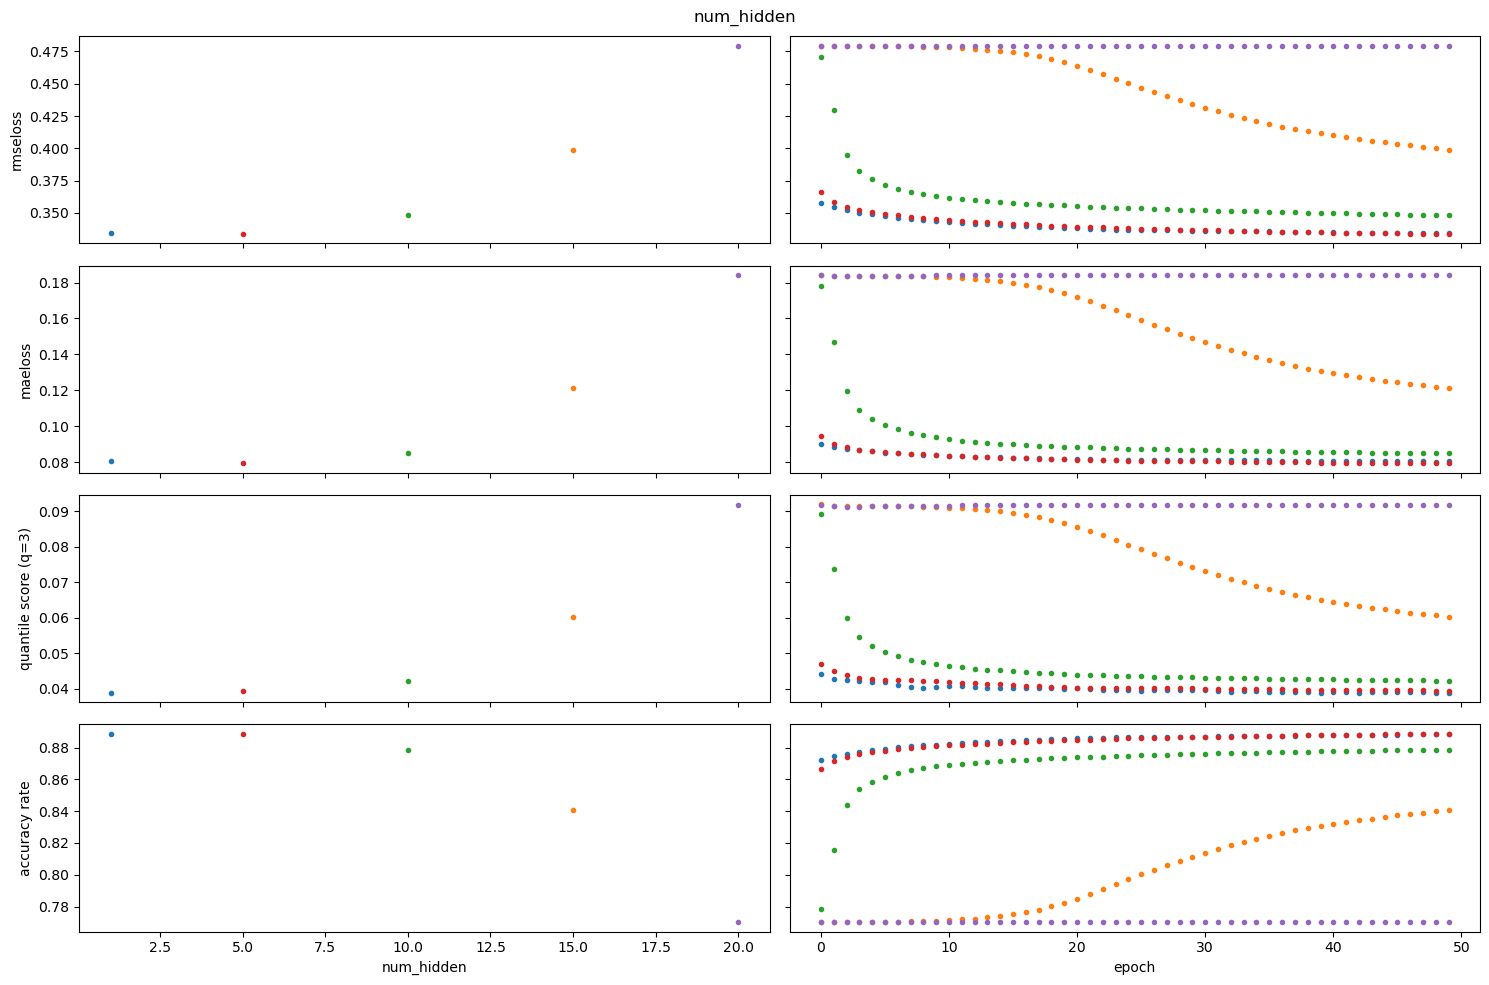

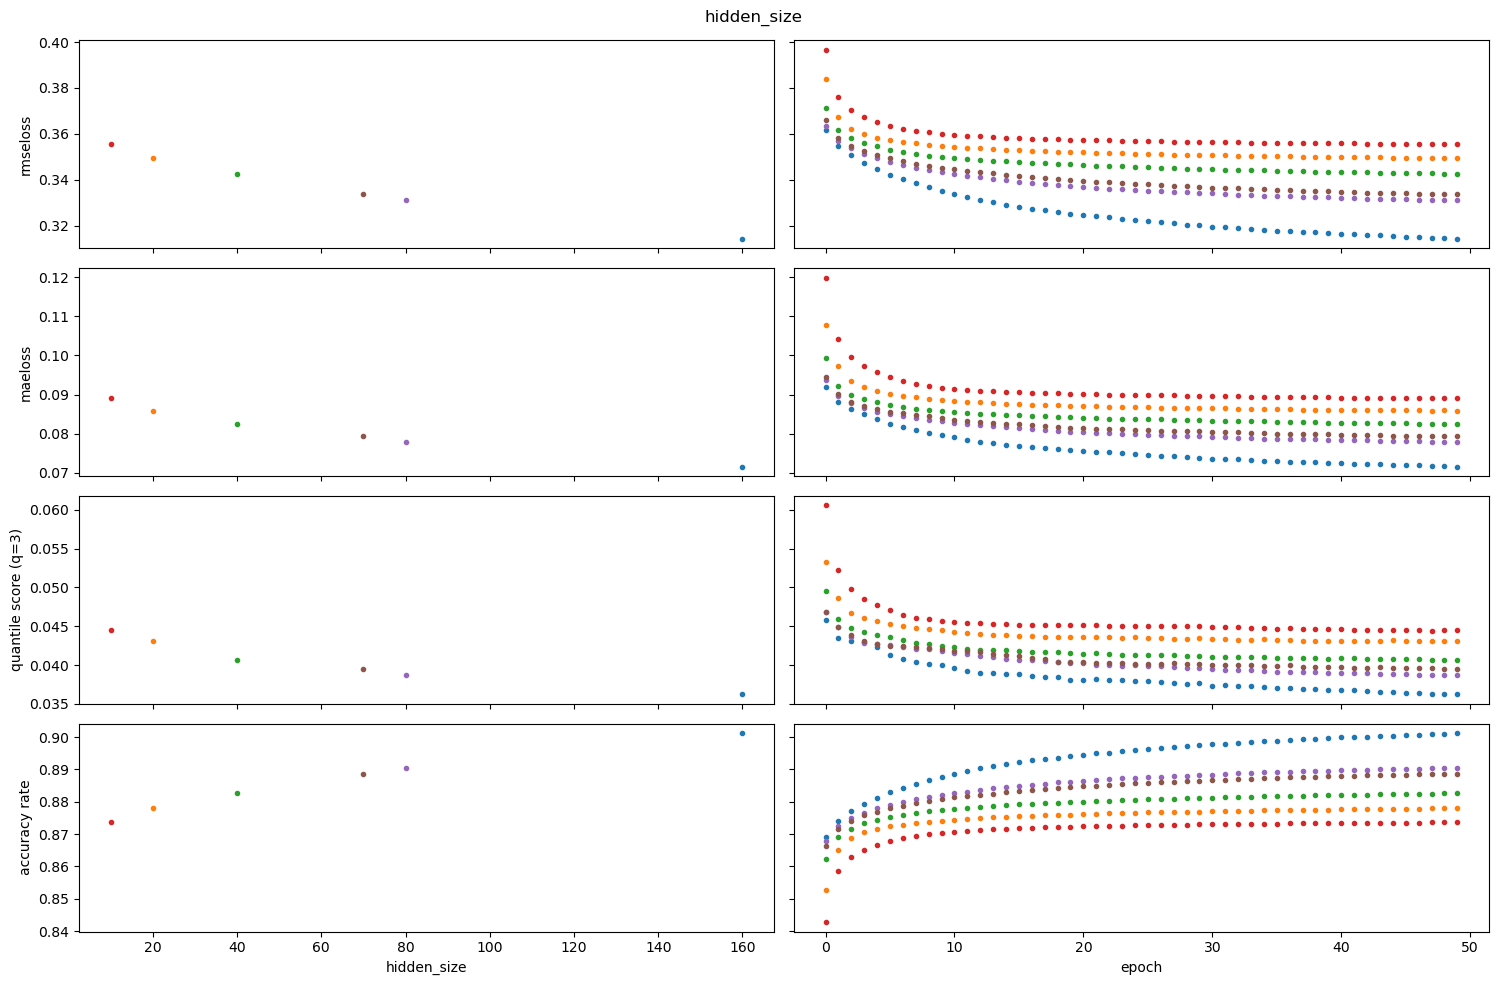

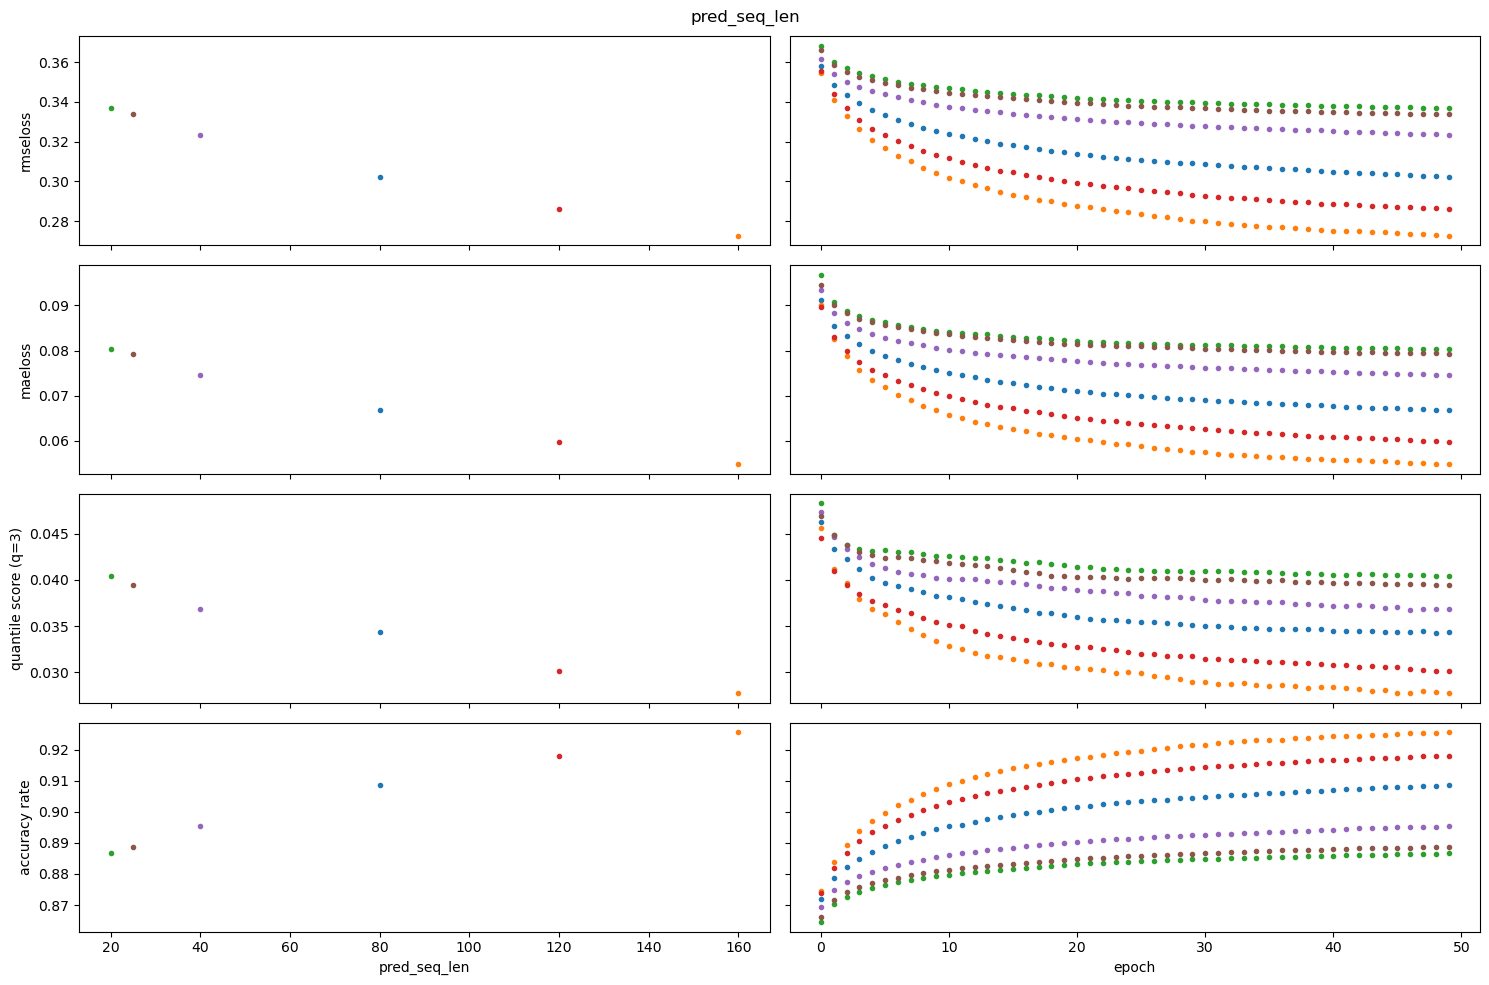

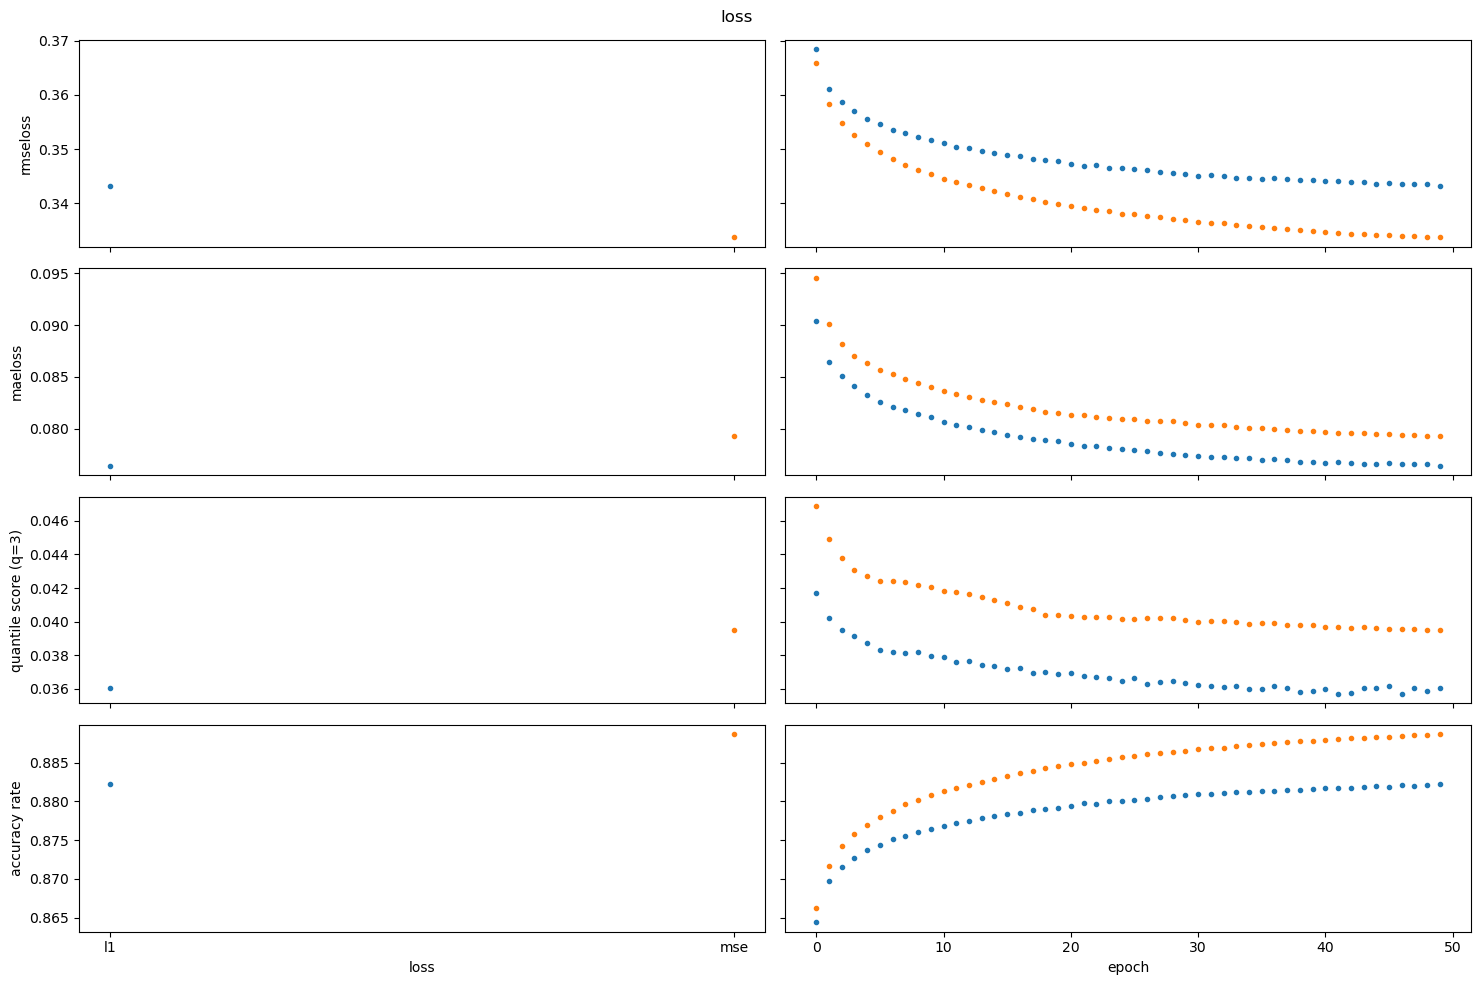

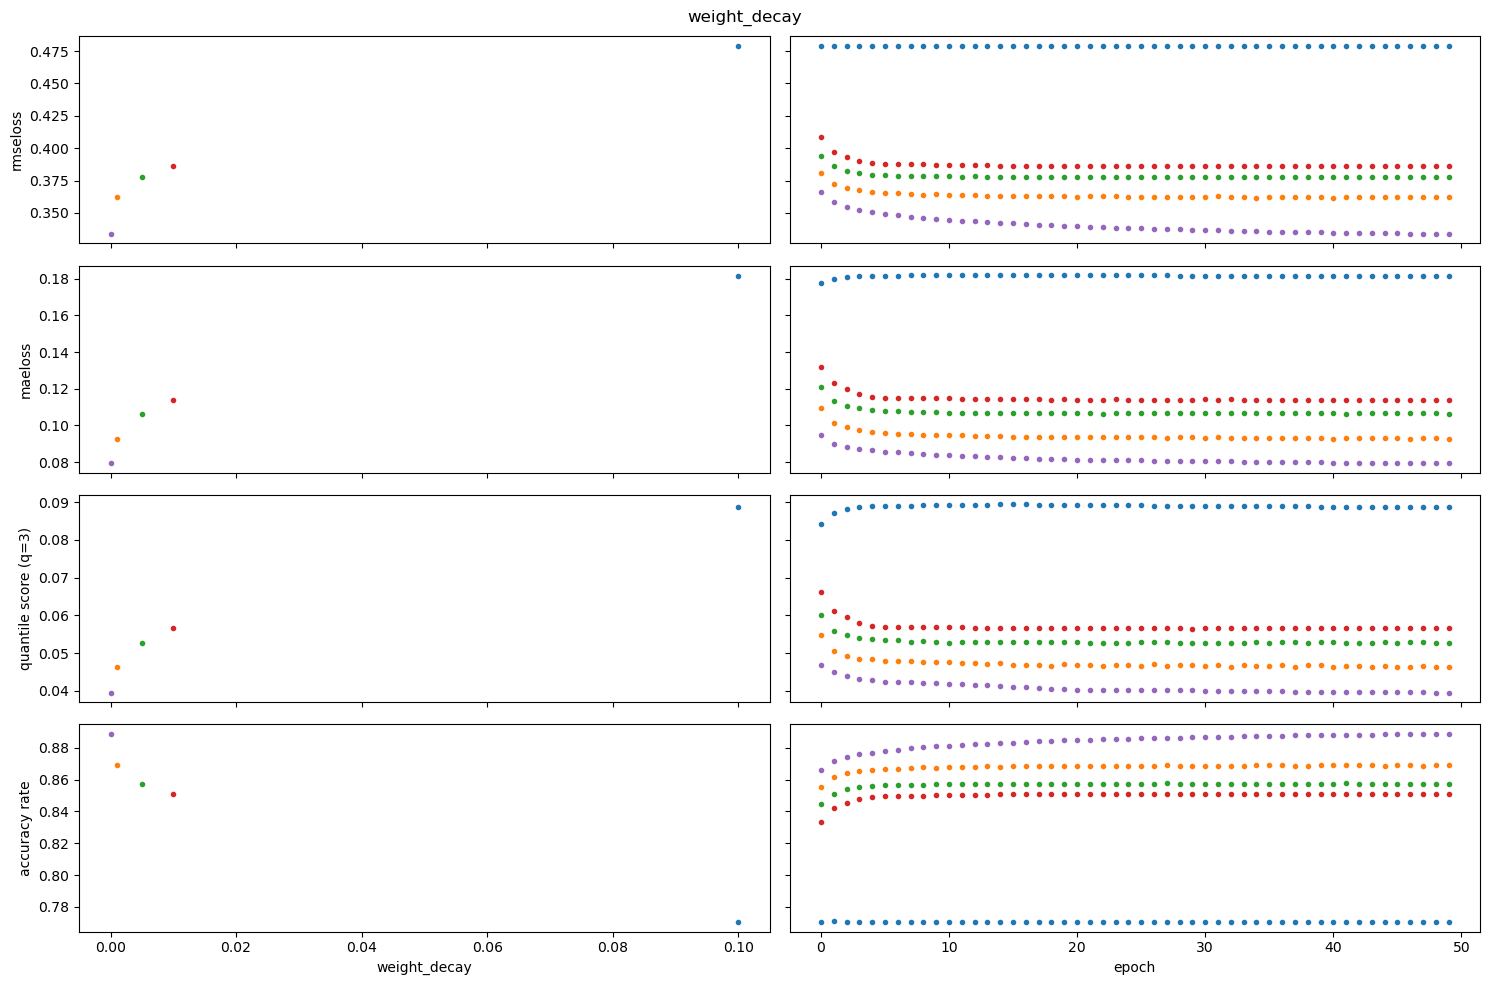

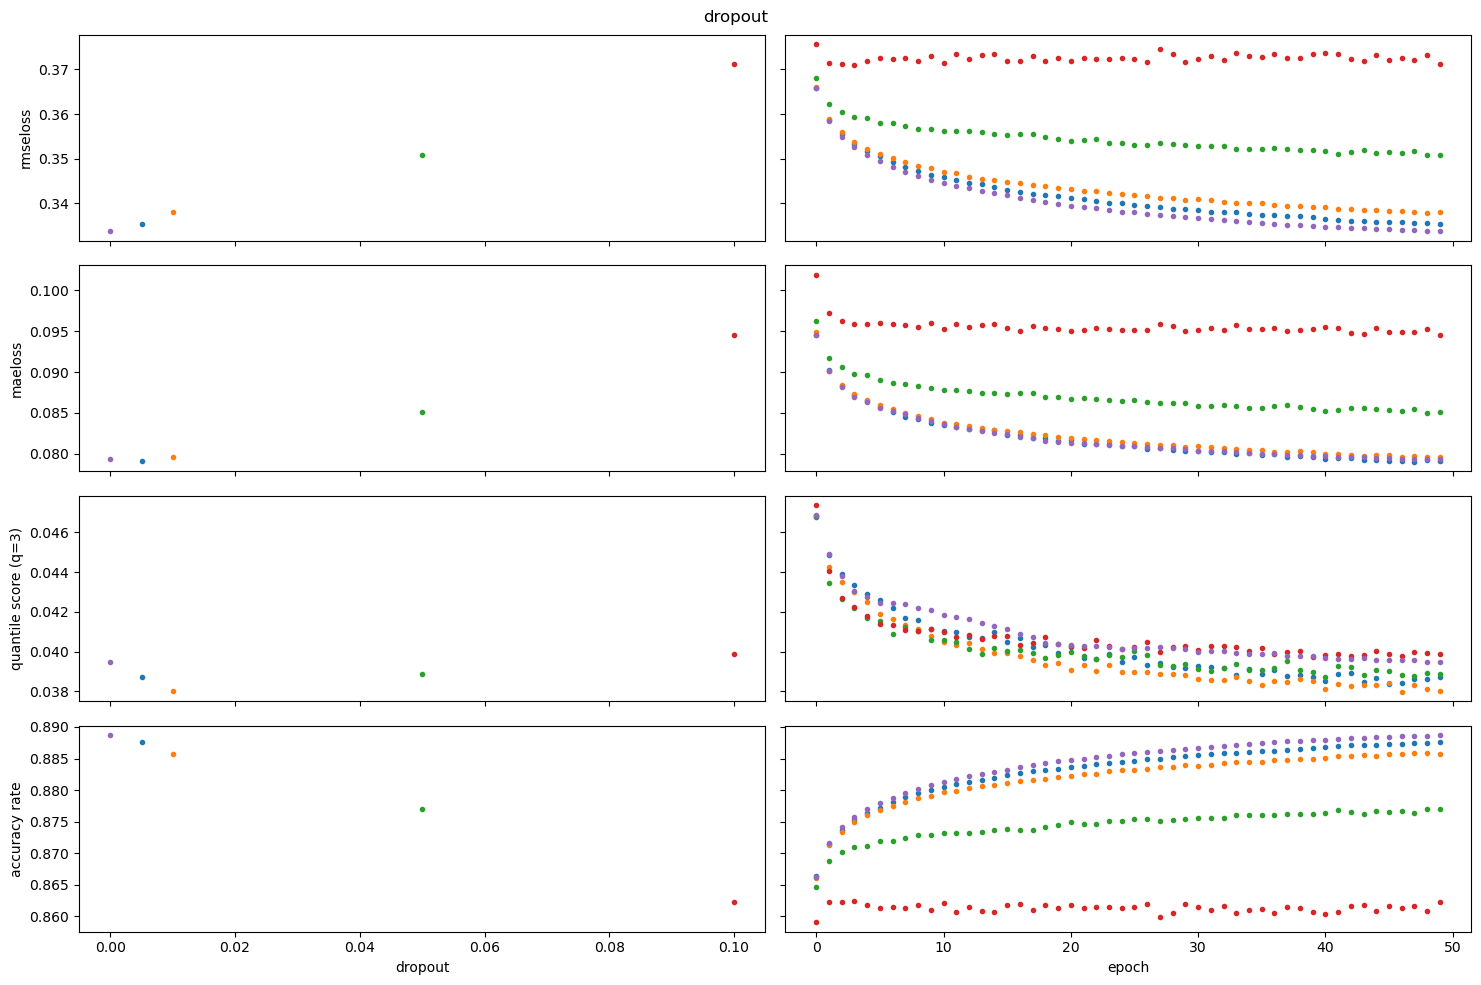

In [252]:
par_plot = 'num_hidden'
subset = {'type':'ffnn', 'case':3}

for par_plot in ffnn_params:
    plot_parameter(par_plot, subset)
